### Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tqdm
from tqdm import tqdm
import nltk
import warnings
warnings.filterwarnings("ignore")
import datetime
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import scipy
from scipy import sparse

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir("/content/drive/My Drive/sentiment analysis")

In [4]:
data=pd.read_csv("df_preprocessed_nw")
data=data.sort_values(by="dates")
data

,Unnamed: 0,Unnamed: 0.1,dates,reviews,reviews.doRecommend,y,polarity
0,16016,16016,2017-03-04 10:47:59.786,great great great great kids play easy monitor...,1,1,0.588889
1,16009,16009,2017-03-04 10:47:59.786,not meet needs not meet needs not meet needs n...,0,0,-0.250000
2,16010,16010,2017-03-04 10:47:59.786,great kids great kids great kids easy little o...,1,1,0.574306
3,16011,16011,2017-03-04 10:47:59.786,kid loves kid loves kid loves great tablet ...,1,1,0.393519
4,16015,16015,2017-03-04 10:47:59.786,great computer great computer great computer ...,1,1,0.625000
...,...,...,...,...,...,...,...
33776,29293,29293,2018-04-28 00:00:00.000,not satisfied sound loses bluetooth connec...,1,0,-0.050000
33777,29413,29413,2018-04-28 00:00:00.000,nice portable speaker alexa nice portable spea...,1,1,0.510000
33778,29469,29469,2018-04-28 00:00:00.000,difficult figure difficult figure difficult fi...,0,0,-0.233333
33779,29548,29548,2018-04-28 00:00:00.000,hands free hands free hands free echo not upda...,1,0,0.308333


Since we need to do time based split, we use numpy.split() and spit first 67% data into train and remaining 33% as test data

In [7]:
 
train, test= np.split(data, [int(.67 *len(data))])

In [8]:
print(train.shape)
train

(22633, 7)


,Unnamed: 0,Unnamed: 0.1,dates,reviews,reviews.doRecommend,y,polarity
0,16016,16016,2017-03-04 10:47:59.786,great great great great kids play easy monitor...,1,1,0.588889
1,16009,16009,2017-03-04 10:47:59.786,not meet needs not meet needs not meet needs n...,0,0,-0.250000
2,16010,16010,2017-03-04 10:47:59.786,great kids great kids great kids easy little o...,1,1,0.574306
3,16011,16011,2017-03-04 10:47:59.786,kid loves kid loves kid loves great tablet ...,1,1,0.393519
4,16015,16015,2017-03-04 10:47:59.786,great computer great computer great computer ...,1,1,0.625000
...,...,...,...,...,...,...,...
22888,20754,20754,2017-08-31 00:00:00.000,best kindle ever best kindle ever best kindle ...,1,1,0.816667
22889,20753,20753,2017-08-31 00:00:00.000,fantastic reader fantastic reader fantastic ...,1,1,0.388095
22890,20751,20751,2017-08-31 00:00:00.000,nice easy read good lighting nice easy read go...,1,1,0.439669
22891,20750,20750,2017-08-31 00:00:00.000,awesome reader awesome reader awesome reader l...,1,1,0.492803


In [9]:
print(test.shape)
test.tail()

(11149, 7)


,Unnamed: 0,Unnamed: 0.1,dates,reviews,reviews.doRecommend,y,polarity
33776,29293,29293,2018-04-28 00:00:00.000,not satisfied sound loses bluetooth connec...,1,0,-0.050000
33777,29413,29413,2018-04-28 00:00:00.000,nice portable speaker alexa nice portable spea...,1,1,0.510000
33778,29469,29469,2018-04-28 00:00:00.000,difficult figure difficult figure difficult fi...,0,0,-0.233333
33779,29548,29548,2018-04-28 00:00:00.000,hands free hands free hands free echo not upda...,1,0,0.308333
33781,29106,29106,2018-04-28 00:00:00.000,portable portable portable wanted portable spe...,0,1,0.320476


Now the features we consider for modeling are: reviews, reviews.dorecommend, polarity and the y values

### Featurization of text data

In [12]:
def featurization(train,test):
  tfidf=TfidfVectorizer()
  tfidf.fit(train["reviews"].values)
  train_text=tfidf.transform(train["reviews"].values)
  test_text=tfidf.transform(test["reviews"].values)
  print(train_text.shape)

  return train_text, test_text

In [37]:
train_text,test_text=featuriation(train,test)
  

(22633, 9761)


In [11]:
# sparse.csr_matrix.sort_indices(test_text)

In [11]:
#now we merge the text features, polarity and do.recommend feature into x
from scipy.sparse import hstack

X_train=hstack((train_text,train["polarity"].values.reshape(-1,1),train["reviews.doRecommend"].values.reshape(-1,1)))
X_test=hstack((test_text,test["polarity"].values.reshape(-1,1),test["reviews.doRecommend"].values.reshape(-1,1)))
y_train=train["y"].values
y_test=test["y"].values
print(X_train.shape)
print(X_test.shape)

(22633, 9763)
(11149, 9763)


Since we splitted the data base on time, we need to check the distribution of classes in train and test

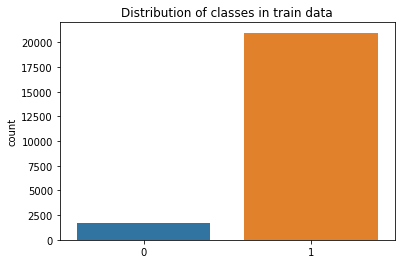

In [12]:
sns.countplot(y_train)
plt.title("Distribution of classes in train data")
plt.show()

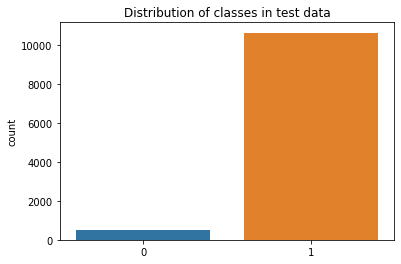

In [13]:
sns.countplot(y_test)
plt.title("Distribution of classes in test data")
plt.show()

The distribution of classes is similar in both train and test data.

### Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train=model.predict(X_train)

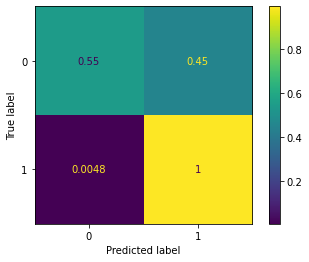

In [ ]:
#confusion matrxi for train data
sklearn.metrics.plot_confusion_matrix(model, X_train, y_train,normalize="true") 

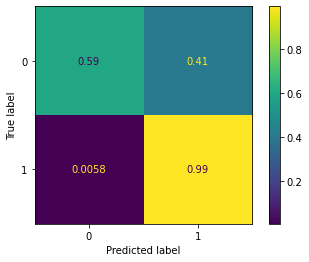

In [ ]:
#confusion matrxi for test data
sklearn.metrics.plot_confusion_matrix(model, X_test, y_test,normalize="true") 

We can see that for the positive class points, the model is predicting the class well. But there is problem while predicting the minority class


Now let's check the performance of the model using data balancing

In [ ]:
model=LogisticRegression(class_weight="balanced")
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

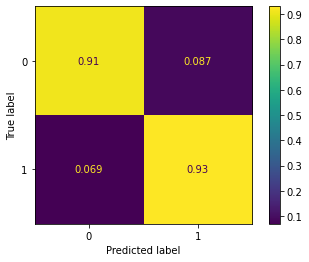

In [ ]:
#confusion matrxi for train data
sklearn.metrics.plot_confusion_matrix(model, X_train, y_train,normalize="true") 

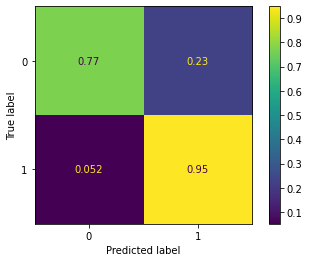

In [ ]:
#confusion matrxi for test data
sklearn.metrics.plot_confusion_matrix(model, X_test, y_test,normalize="true") 

**Observations from logistic regression model:** We can see that the performance is highly improved when we balance the classes. Simple model like Logistic Regression is able to obtain good results with this

**MODEL 2--Naive Bayes**

In [14]:
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()

In [17]:
Xtrain=X_train.toarray()
Xtest=X_test.toarray()

In [31]:
print(y_train)

[1 0 1 ... 1 1 1]


In [18]:
model2.fit(Xtrain,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

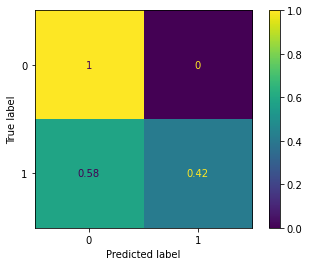

In [19]:
#confusion matrix for train data
sklearn.metrics.plot_confusion_matrix(model2, Xtrain, y_train,normalize="true") 

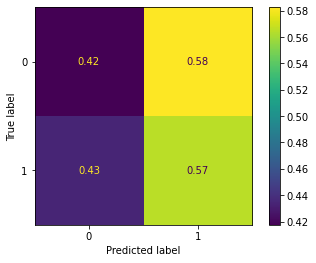

In [20]:
#confusion matrxi for train data
sklearn.metrics.plot_confusion_matrix(model2, Xtest, y_test,normalize="true") 

**CONCLUSIONS FROM MODEL 2**
This model is not classifying the negative reviews correctly. This inaccuarcy in predicting the negative class is more in test data. So we cannot consider this model

**Model 3-- XGBOOST**

In [5]:
import xgboost
from xgboost import XGBClassifier

In [6]:
model3=XGBClassifier()


### Hyper parameter tuning of the model



In [23]:
from sklearn.model_selection import GridSearchCV

In [26]:

max_depth=[1,2,4,6]
n_estimators=[10,50,100,150,200]
params = {'max_depth': [1,2,4,6],'n_estimators': [10,50,100,150,200]}
best_model=GridSearchCV(model3,params,cv=3, scoring='roc_auc', return_train_score=True,n_jobs=-1,verbose=1)

In [27]:
best_model.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 4, 6],
                         'n_estimators': [10, 50, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

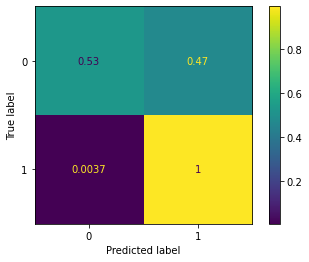

In [28]:

sklearn.metrics.plot_confusion_matrix(best_model, X_train, y_train,normalize="true") 

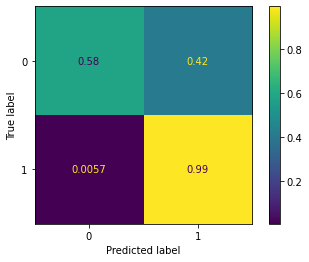

In [29]:
#confusion matrxi for test data
sklearn.metrics.plot_confusion_matrix(best_model, X_test, y_test,normalize="true") 

**OBSERVATION**

This model performed better than Logistic Regression model without balancing the data. However, we can see that the predictions of negative reviews are still not improved very much. So we need to try with upsampling the negative reviews

Upsampling of negative reviews

In [7]:
from sklearn.utils import resample
df_majority = data[data.y==1]
df_minority = data[data.y==0]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=df_majority.shape[0],random_state=123) # reproducible results
# Combine majority class with upsampled minority class
data_balanced = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
data_balanced.y.value_counts()

1    31629
0    31629
Name: y, dtype: int64

In [18]:
#train_test split
data_balanced=data_balanced.sort_values(by="dates")
 
train, test= np.split(data_balanced, [int(.67 *len(data_balanced))])

In [19]:
print(train.shape)
print(test.shape)

(42382, 7)
(20876, 7)


In [20]:
#obtaining featurization
train_text,test_text=featurization(train,test)

(42382, 9378)


In [21]:
#now we merge the text features, polarity and do.recommend feature into x
from scipy.sparse import hstack

X_train=hstack((train_text,train["polarity"].values.reshape(-1,1),train["reviews.doRecommend"].values.reshape(-1,1)))
X_test=hstack((test_text,test["polarity"].values.reshape(-1,1),test["reviews.doRecommend"].values.reshape(-1,1)))
y_train=train["y"].values
y_test=test["y"].values
print(X_train.shape)
print(X_test.shape)

(42382, 9380)
(20876, 9380)


In [24]:
max_depth=[1,2,4,6]
n_estimators=[10,50,100,150,200]
params = {'max_depth': [1,2,4,6],'n_estimators': [10,50,100,150,200]}
best_model=GridSearchCV(model3,params,cv=3, scoring='roc_auc', return_train_score=True,n_jobs=-1,verbose=1)

In [25]:
best_model.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 4, 6],
                         'n_estimators': [10, 50, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

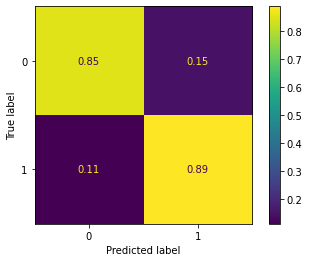

In [26]:
#confusion matrxi for train data
sklearn.metrics.plot_confusion_matrix(best_model, X_train, y_train,normalize="true") 

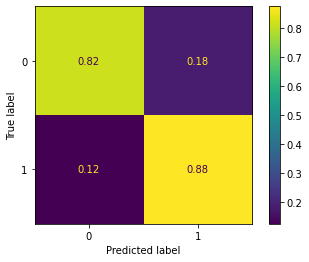

In [27]:
#confusion matrxi for test data
sklearn.metrics.plot_confusion_matrix(best_model, X_test, y_test,normalize="true") 

**OBSERVATIONS FROM MODEL 3:**

This model performed almost as good as model 1 when classes are balanced. The improvement which was observed in this model is that the prediction of negative reviews was improved as comapred to model1. 82% of negative reviews was correctly classified in model 3 where as in model 1 it was 77%

**CONCLUSIONS AND IMPROVEMENTS REQUIRED**
 
 We need to try with other featurization methods

 We will consider model 1 and model3 for testing them

 Even after data balancing, the prediction in negative reviews is not very good. This is because, through upsamling we are simply replicating the reviews, without letting the model to learn any additional information.
 
 We need to try with test augmentation techniques in negative reviews and check if they improve the classification